In [2]:
%load_ext ferretmagic

In [3]:
%%ferret 
use DATA/TG/Cylone/Cyclone_Phailin.nc
use DATA/TG/Cylone/Nagapattinam_Phailin.nc
use DATA/TG/Cylone/Chennai_Phailin.nc
use DATA/TG/Cylone/Ennore_Phailin.nc
use DATA/TG/Cylone/Krishnapatnam_Phailin.nc
use DATA/TG/Cylone/Kakinada_Phailin.nc
use DATA/TG/Cylone/Visakhapatnam_Phailin.nc
use DATA/TG/Cylone/Paradeep_Phailin.nc


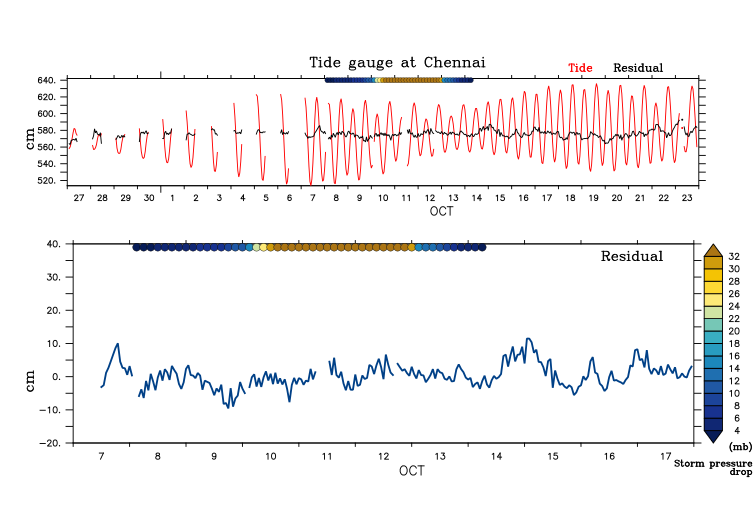

In [11]:
%%ferret
let etime = "17-Oct-2013 23:00"  
let tg    = 2
let Nag = sla[d=2]
let Che = sla[d=3]
let Enn = sla[d=4]
let Kri = sla[d=5]
let Kak = sla[d=6]
let Vis = sla[d=7]
let Par = sla[d=8]

let Nag_t = if flag[d=2] eq 0 then raw[d=2] - sla[d=2]
let Che_t = if flag[d=3] eq 0 then raw[d=3] - sla[d=3] 
let Enn_t = if flag[d=4] eq 0 then raw[d=4] - sla[d=4]
let Kri_t = if flag[d=5] eq 0 then raw[d=5] - sla[d=5]
let Kak_t = if flag[d=6] eq 0 then raw[d=6] - sla[d=6]
let Vis_t = if flag[d=7] eq 0 then raw[d=7] - sla[d=7]
let Par_t = if flag[d=8] eq 0 then raw[d=8] - sla[d=8]


set win/asp=.7

define viewport/xlimit=0:1/ylimit=0.5:1 Zout
define viewport/xlimit=0:1/ylimit=0.0:0.7 Zin

 set viewport Zout
 cancel region/all
  if `tg EQ 1` then
    plot/nolab/color=100,000,000/vlimit=`Nag_t[l=@min]`:`Nag_t[l=@max]+6` Nag_t
    plot/nolab/color=000,000,000/over Nag+Nag_t[l=@ave]
    label 9190,`Nag_t[l=@max]+20`,1,0,0.17 @CRTide gauge at Nagapatanam
    let yaxis = `Nag_t[l=@max]+4` 
 elif `tg EQ 2` then 
    plot/nolab/color=100,000,000/vlimit=`Che_t[l=@min]`:`Che_t[l=@max]+6` Che_t
    plot/nolab/color=000,000,000/over Che+Che_t[l=@ave]
    label 9190,`Che_t[l=@max]+20`,1,0,0.17 @CRTide gauge at Chennai
    let yaxis = `Che_t[l=@max]+4`
 elif `tg EQ 3` then
    plot/nolab/color=100,000,000/vlimit=`Enn_t[l=@min]`:`Enn_t[l=@max]+6` Enn_t
    plot/nolab/color=000,000,000/over Enn+Enn_t[l=@ave]
    label 9190,`Enn_t[l=@max]+20`,1,0,0.17 @CRTide gauge at Ennore
    let yaxis = `Enn_t[l=@max]+4`
 elif `tg EQ 4` then
   plot/nolab/color=100,000,000/vlimit=`Kri_t[l=@min]`:`Kri_t[l=@max]+6` Kri_t
    plot/nolab/color=000,000,000/over Kri+Kri_t[l=@ave]
    label 9190,`Kri_t[l=@max]+20`,1,0,0.17 @CRTide gauge at Krishnapatnam
    let yaxis = `Kri_t[l=@max]+4`
 elif `tg EQ 5` then
    plot/nolab/color=100,000,000/vlimit=`Kak_t[l=@min]`:`Kak_t[l=@max]+6` Kak_t
    plot/nolab/color=000,000,000/over Kak+Kak_t[l=@ave]
    label 9190,`Kak_t[l=@max]+20`,1,0,0.17 @CRTide gauge at Kakinada
    let yaxis = `Kak_t[l=@max]+4`
 elif `tg EQ 6` then
    plot/nolab/color=100,000,000/vlimit=`Vis_t[l=@min]`:`Vis_t[l=@max]+6` Vis_t
    plot/nolab/color=000,000,000/over Vis+Vis_t[l=@ave]
    label 9190,`Vis_t[l=@max]+20`,1,0,0.17 @CRTide gauge at Visakhapatnam
    let yaxis = `Vis_t[l=@max]+4`
 else
    plot/nolab/color=100,000,000/vlimit=`Par_t[l=@min]`:`Par_t[l=@max]+6` Par_t
    plot/nolab/color=000,000,000/over Par+Par_t[l=@ave]
    label 9190,`Par_t[l=@max]+20`,1,0,0.17 @CRTide gauge at Paradeep
    let yaxis = `Par_t[l=@max]+4`
 endif

 ribbon/vs/over/sym=circfill/highlight/siz=0.1/lev=(-inf)(4,32,2)(inf)/palette=blue_green_gold/nolab t[gt=dp[d=1]],dp[d=1]*0+`yaxis`,dp[d=1]

set viewport Zin
set region/t="`pres[d=1],return=tstart`":"`etime`"
if `tg EQ 1` then
    plot/nolab/thick=2/vlimit=-20:40/color=000,000,000 Nag
 elif `tg EQ 2` then
    plot/nolab/thick=2/vlimit=-20:40/color=000,025,053 Che
 elif `tg EQ 3` then
    plot/nolab/thick=2/vlimit=-20:40/color=000,043,033 Enn
 elif `tg EQ 4` then
    plot/nolab/thick=2/vlimit=-20:40/color=000,070,093 Kri
 elif `tg EQ 5` then
    plot/nolab/thick=2/vlimit=-20:40/color=029,000,051 Kak
 elif `tg EQ 6` then
    plot/nolab/thick=2/vlimit=-20:40/color=055,010,010 Vis
 else 
    plot/nolab/thick=2/vlimit=-20:40/color=085,085,010 Par
 endif
ribbon/vs/over/key/sym=circfill/highlight/siz=0.15/lev=(-inf)(4,32,2)(inf)/palette=blue_green_gold//nolab t[gt=dp[d=1]],dp[d=1]*0+39,dp[d=1]

label 9038,-27,1,0,0.1 @CRStorm pressure
label 9038,-29.5,1,0,0.1 @CRdrop
label 9038,-22,1,0,0.1 @CR(mb)

label 9000,35,1,0,0.15 @CRResidual
label 8970,92,1,0,0.12 @P2@CRTide
label 9000,92,1,0,0.12 @CRResidual

label 8732,2,1,90,0.15 @CRcm
label 8732,75,1,90,0.15 @CRcm